# 영화리뷰(06.29.월)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)


mpl.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split

# pip install mglearn
import mglearn
from numpy import linalg




from sklearn.linear_model import LogisticRegression    # 회귀알고리즘
from sklearn.svm import LinearSVC                      # 회귀알고리즘


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

from sklearn.model_selection import cross_val_score    # 교차검증 할 때 쓰는 import
from sklearn.tree import DecisionTreeClassifier         # decisiontree import

import sklearn.datasets as datasets    # 데이터셋 가져오는 임포트

import sklearn.metrics 

In [3]:
# Multinomial NB : 영화리뷰

In [5]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df=pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [9]:
# type에 있는 것을 숫자화
df['label']=df['type'].map({'positive':1,'negative':0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [12]:
df_x=df['movie_review']   # 훈련데이터

df_y=df['label']          #실제데이터

In [21]:
# 입력데이터는 고정된 크기의 벡터로써, 각각의 인덱스는 단어의 빈도수로 구분

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

cv=CountVectorizer()
x_traincv=cv.fit_transform(df_x)
encoded_input=x_traincv.toarray()   # x_traincv를 배열로 꺼내오기
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [23]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [24]:
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [27]:
mnb=MultinomialNB()
y_train=df_y.astype('int')
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

In [30]:
test_df=pd.DataFrame(test_feedback_list)
test_df['label']=test_df['type'].map({'positive':1,'negative':0})
test_x=test_df['movie_review']
test_y=test_df['label']

In [31]:
x_testcv=cv.transform(test_x)
x_testcv

<10x37 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [32]:
#예측하기
pred=mnb.predict(x_testcv)
pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [33]:
accuracy_score(test_y,pred)

1.0

In [36]:
# 베르누이 NB : 스팸메일구분
from sklearn.naive_bayes import BernoulliNB

In [37]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

df=pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [39]:
df['label']=df['spam'].map({True:1,False:0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [40]:
df_x=df['email title']
df_y=df['label']

In [42]:
# 입력데이터는 고정된 크기의 벡터로써, 0과 1로 구분
cv= CountVectorizer(binary=True)    # binary=True  -> 0과 1로 계산이 되게 한다.
x_traincv=cv.fit_transform(df_x)
encoded_input=x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [43]:
cv.inverse_transform(encoded_input[0])
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [44]:
bnb=BernoulliNB()
y_train=df_y.astype('int')
bnb.fit(x_traincv,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [48]:
test_email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_df=pd.DataFrame(test_email_list)
test_df['label']=test_df['spam'].map({True:1,False:0})
test_x=test_df['email title']
test_y=test_df['label']
x_testcv=cv.transform(test_x)


In [49]:
pred=bnb.predict(x_testcv)
pred

array([1, 1, 1, 0, 0, 0])

In [50]:
accuracy_score(test_y,pred)

1.0

# 비지도 학습

## K-means

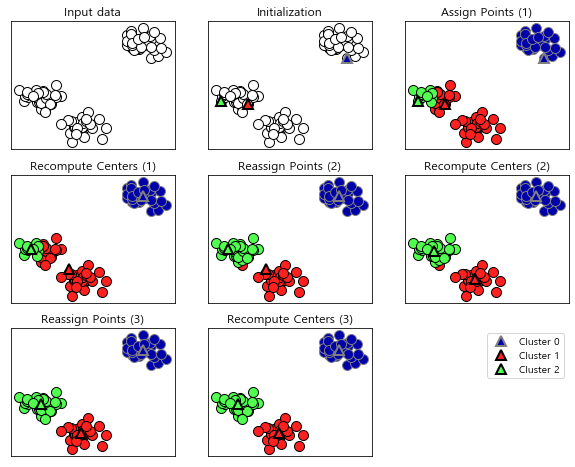

In [51]:
mglearn.plots.plot_kmeans_algorithm()

In [58]:
from sklearn.cluster import KMeans
import mglearn

In [65]:
X, y=sklearn.datasets.make_blobs()

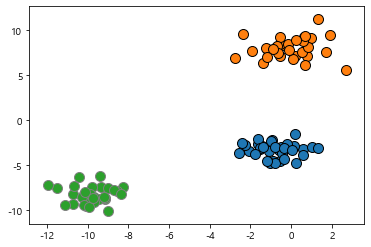

In [67]:
mglearn.discrete_scatter(X[:,0], X[:,1], y, markers = 'o')   # 원래 정답

In [69]:
km=KMeans(n_clusters=3).fit(X)

In [72]:
lbl=km.labels_    # 자기가 찾은 정답

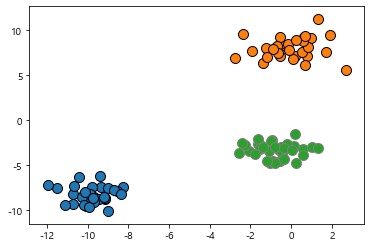

In [73]:
mglearn.discrete_scatter(X[:,0], X[:,1], lbl, markers = 'o')   # 자기 혼자 학습한 정답을 그래프로 나타내기

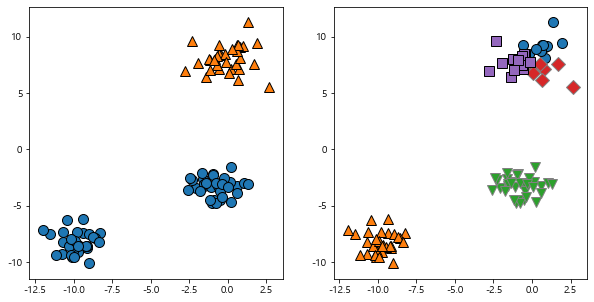

In [77]:
flg,axes=plt.subplots(1,2,figsize=(10,5))
idx=0
for k in [2,5]:
    km=KMeans(n_clusters=k).fit(X)
    lbl=km.labels_
    mglearn.discrete_scatter(X[:,0], X[:,1], lbl, ax=axes[idx]) 
    idx +=1

In [78]:
KMeans().fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### iris 샘플

In [79]:
iris=sklearn.datasets.load_iris()
X=pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
y=pd.DataFrame(iris.target,columns=['target'])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

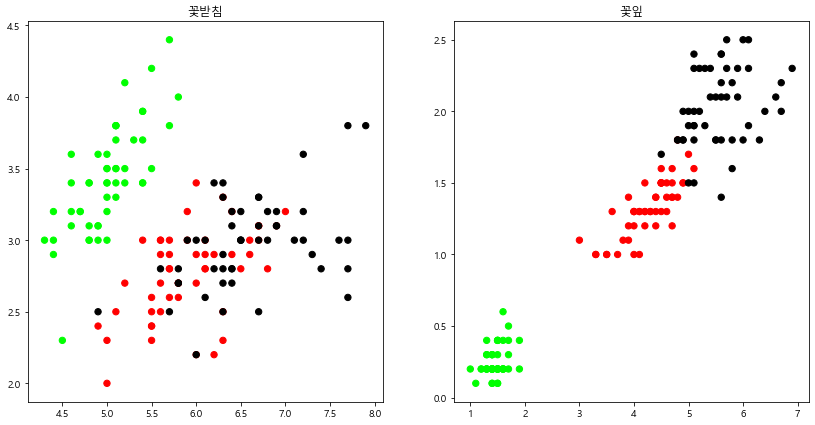

In [85]:
plt.figure(figsize=(14,7))
colormap= np.array(['lime','red','black'])                 # 미리 색상지정


plt.subplot(1,2,1)
plt.scatter(X.sepal_length,X.sepal_width, c=colormap[y.target], s=40)
plt.title('꽃받침')



plt.subplot(1,2,2)
plt.scatter(X.petal_length,X.petal_width, c=colormap[y.target], s=40)
plt.title('꽃잎')

In [86]:
model=KMeans(n_clusters=3).fit(X)

In [87]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '결과')

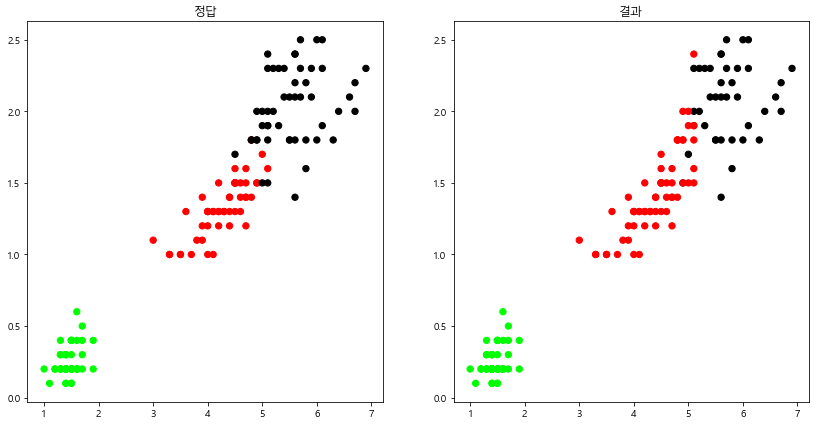

In [88]:
plt.figure(figsize=(14,7))
colormap= np.array(['lime','red','black'])                 # 미리 색상지정


plt.subplot(1,2,1)
plt.scatter(X.petal_length,X.petal_width, c=colormap[y.target], s=40)
plt.title('정답')



plt.subplot(1,2,2)
plt.scatter(X.petal_length,X.petal_width, c=colormap[model.labels_], s=40)
plt.title('결과')

In [89]:
accuracy_score(y,model.labels_)

0.8933333333333333

In [91]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

### 사람의 키와 몸무게를 조사해서 비만인지 저체중인지 표준인지 분류하기 (비지도이용)

In [92]:
df=pd.DataFrame(columns=['height','weight'])
df.loc[0]=[185,60]
df.loc[1]=[180,60]
df.loc[2]=[185,70]
df.loc[3]=[165,63]
df.loc[4]=[155,68]
df.loc[5]=[170,75]
df.loc[6]=[175,80]

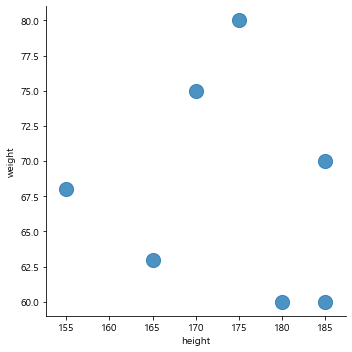

In [93]:
sns.lmplot('height','weight',data=df,fit_reg=False,scatter_kws={'s':200})

In [94]:
model=KMeans(n_clusters=3).fit(df.values)

In [95]:
df['label']=model.labels_
df

,height,weight,label
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,2
4,155,68,2
5,170,75,0
6,175,80,0


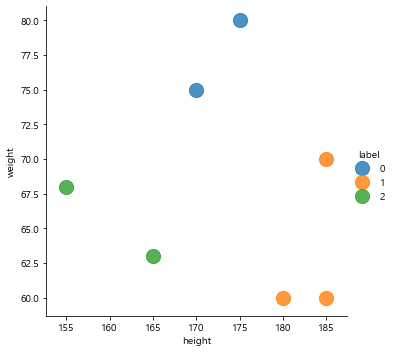

In [96]:
sns.lmplot('height','weight',data=df,fit_reg=False,scatter_kws={'s':200},hue='label')  # hue='label'  label로 색깔지정

## 사례: 타이타닉을 이용한 분류 알고리즘 성능비교
### 부제: 캐글 제출용

### 1. Collecting the data
     - https://www.kaggle.com/c/titanic/data

In [98]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

### 2. Exploratory Data Analysis(탐색적 데이터분석)

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [102]:
'''
- Pclass
- Sex
- SibSp
- Parch
- Embarked
   C= Cherbourg, Q= Queenstown, S= Southampton
- Cabin 
'''

'''
- survival : 생존 여부 (0 : 사망, 1 :생존)
- pclass : 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex : 성별 (male, female)
- Age : 당시 나이
- sibsp : 타이타닉에 탑승한 형제, 자매, 배우자의 수
- parch : 타이타닉에 탑승한 부모, 자식의 수
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 승선한 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)
'''

def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()    # 생존자 막대그래프
    dead=train[train['Survived']==0][feature].value_counts()        # 사망자 막대그래프
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

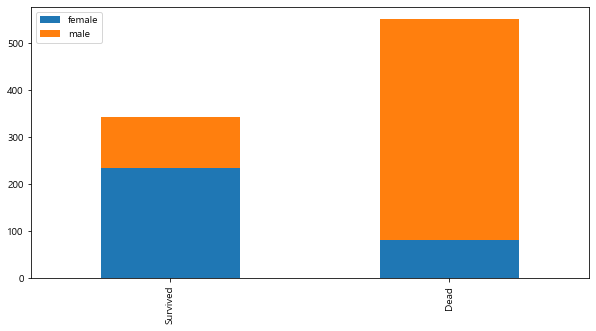

In [103]:
bar_chart('Sex')

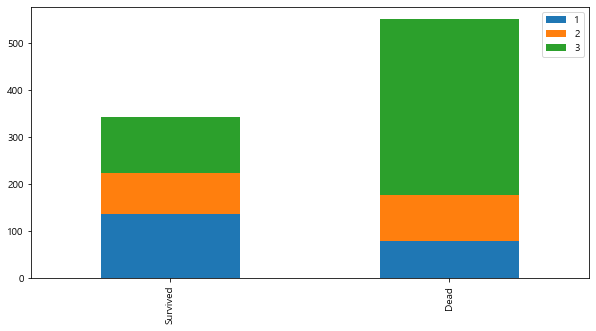

In [104]:
bar_chart('Pclass')

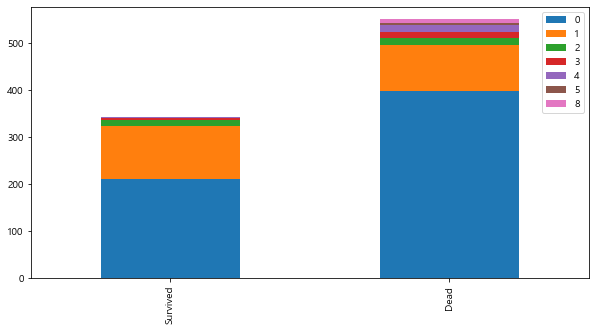

In [105]:
bar_chart('SibSp')

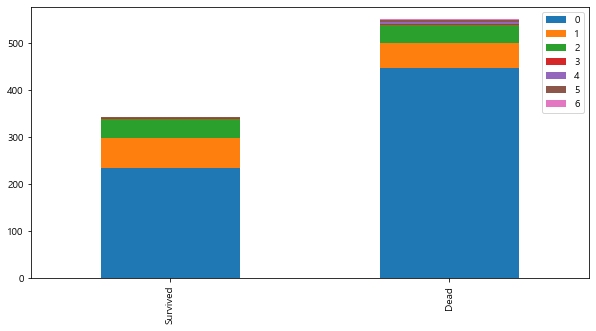

In [106]:
bar_chart('Parch')

### 3.Feature Engineering

In [125]:
train.head()   # 이름은 생존여부에 영향을 미치지 않는다. 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Name: Mr,Mrs,Miss 를 추출

In [126]:
# name에서 mr, mre,miss를 추출

train_test_data=[train,test]         # 2개의 데이터프레임을 하나로 묶어서

for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.')    # 정규표현식을 이용해서 걸러내기
                                                                      # 맨앞에 공백, 문자하나이상

In [127]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Countess      1
Lady          1
Sir           1
Capt          1
Don           1
Mme           1
Ms            1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64


In [128]:
title_mapping = {"Mr": 0, "Miss" : 1, "Mrs" : 2 , "Master" : 3, "Dr" : 3, "Rev" : 3, "Col" : 3, 
                 "Mlle" : 3, "Major" : 3, "Countess" : 3, "Mme" : 3, "Lady" : 3, "Jonkheer" : 3,
                 "Sir" : 3, "Capt" : 3, "Don" : 3, "Ms": 3, "Dona":3}

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


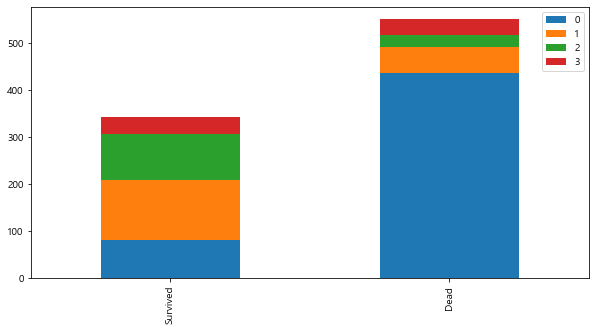

In [130]:
bar_chart('Title')

In [131]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [136]:
#Name열 삭제한거 확인
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


##### Sex 데이터의 인코딩

In [137]:
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map({'male':0,'female':1})

In [140]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


##### Age데이터의 binning
      child: 0 , young: 1, adult: 2, mid-age: 3, senior: 4

In [141]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [143]:
# 결측치처리: 남자들은 Mr의 중앙값, Mrs는 Mrs의 중앙값, Miss는 Miss의 중앙값

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),
                    inplace=True) # fillna : 결측치를 무엇으로 채우게 하는 함수
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'),
                  inplace=True)
                        

In [144]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [147]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<16,'Age']=0
    dataset.loc[(dataset['Age']>=16)&(dataset['Age']<26),'Age']=1
    dataset.loc[(dataset['Age']>=26)&(dataset['Age']<36),'Age']=2
    dataset.loc[(dataset['Age']>=36)&(dataset['Age']<62),'Age']=3
    dataset.loc[dataset['Age']>=62,'Age']=4

In [149]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


##### Embarked 

In [151]:
train.isnull().sum()
test.isnull().sum() 

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [152]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [153]:
train['Embarked']=train['Embarked'].fillna('S')    # 결측치를 'S'로 채움

In [154]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [155]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2})

In [157]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


##### Fare 

In [161]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [162]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [164]:
test['Fare'].isnull().sum()    # Fare에 있는 결측치 제거

0

In [166]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17,'Fare']=0
    dataset.loc[(dataset['Fare']>17)&(dataset['Fare']<=30),'Fare']=1
    dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=100),'Fare']=2
    dataset.loc[dataset['Fare']>100,'Fare']=3

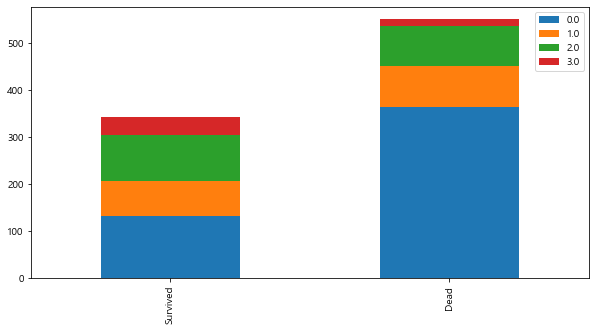

In [167]:
bar_chart('Fare')

##### cabin

In [168]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [169]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
C22 C26        3
              ..
A14            1
D47            1
B79            1
D50            1
E38            1
Name: Cabin, Length: 147, dtype: int64

In [171]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]    # cabin에서 첫번째 글자 가져오기!

In [172]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


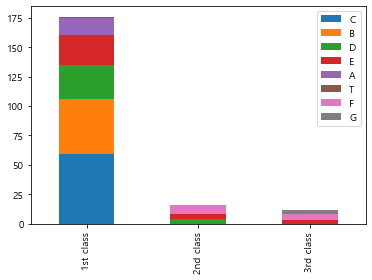

In [174]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()

df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True)

In [175]:
cabin_mapping={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}

for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [176]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [178]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,1,3.0,1,0,363272,0.0,0.8,0,2
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0
3,895,3,0,2.0,0,0,315154,0.0,0.8,0,0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2


##### 동승자 컬럼합치기

In [179]:
train['FamilySize']=train['SibSp']+train['Parch']+1       #   +1은 자기자신. 
test['FamilySize']=test['SibSp']+test['Parch']+1

In [181]:
train['FamilySize'].value_counts()
test['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [182]:
feature_drop=['Ticket','SibSp','Parch']
train=train.drop(feature_drop,axis=1)
test=test.drop(feature_drop,axis=1)

In [183]:
# ticket,sibsp,parch컬럼 삭제한것 확인

train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,0.8,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,0.8,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [184]:
train=train.drop(['PassengerId'],axis=1)

In [187]:
train_data=train.drop('Survived',axis=1)       # 생사여부제외하고 저장.
target=train['Survived']                       # 타켓에 생사여부 저장

In [188]:
print(train_data.shape,target.shape)

(891, 8) (891,)


In [189]:
train_data.to_csv('data/train_data.csv',index=False)
target.to_csv('data/target.csv',index=False)

In [190]:
test.to_csv('data/test0629.csv',index=False)

 ### 4.Modeling
     - KNN
     - Decision Tree
     - Random Forest
     - SVN
     - Naive Bayes

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 적합성검사를 위한  import
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [6]:
train_data=pd.read_csv('data/train_data.csv')
target=pd.read_csv('data/target.csv',header=None)

In [17]:
train_data
#target

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,2.0,0.0,2.0,0,1,1
3,1,1,2.0,2.0,0.8,0,2,2
4,3,0,2.0,0.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,1.8,0,3,1
887,1,1,1.0,1.0,0.4,0,1,1
888,3,1,1.0,1.0,2.0,0,1,4
889,1,0,2.0,1.0,0.8,1,0,1


In [9]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [12]:
target.drop(0, axis = 0, inplace = True)
target.head()

,0
1,0
2,1
3,1
4,1
5,0


In [13]:
# KNN 객체생성
clf=KNeighborsClassifier(n_neighbors=13)


score=cross_val_score(clf,train_data,target,cv=kfold,scoring='accuracy') # (사용할 알고리즘, 훈련데이터, 정답,cv=kfold) 

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

In [14]:
print(score)
print(np.mean(score)*100,2)

[0.8        0.74157303 0.82022472 0.85393258 0.80898876 0.83146067
 0.80898876 0.75280899 0.80898876 0.82022472]
80.47191011235955 2


In [15]:
#Decision Tree

clf=DecisionTreeClassifier()
score=cross_val_score(clf,train_data,target,cv=kfold,scoring='accuracy')
print(score)
print(np.mean(score)*100,2)

[0.78888889 0.88764045 0.75280899 0.78651685 0.87640449 0.78651685
 0.80898876 0.79775281 0.74157303 0.80898876]
80.36079900124845 2


In [16]:
#Random Forest

clf=RandomForestClassifier(n_estimators=13)
score=cross_val_score(clf,train_data,target,cv=kfold,scoring='accuracy')
print(score)
print(np.mean(score)*100,2)

[0.8        0.84269663 0.80898876 0.83146067 0.83146067 0.82022472
 0.85393258 0.78651685 0.79775281 0.82022472]
81.93258426966293 2


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

In [18]:
# Naive Bayes

clf= GaussianNB()
score=cross_val_score(clf,train_data,target,cv=kfold,scoring='accuracy')
print(score)
print(np.mean(score)*100,2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]
78.78027465667914 2


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

In [19]:
# SVM

clf= SVC()
score=cross_val_score(clf,train_data,target,cv=kfold,scoring='accuracy')
print(score)
print(np.mean(score)*100,2)

[0.83333333 0.78651685 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.83146067 0.85393258]
82.60299625468164 2


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

### 5.Testing

In [21]:
clf=SVC()
clf.fit(train_data,target)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
 test=pd.read_csv('data/test0629.csv')

In [23]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,0.8,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,0.8,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0.0,1.8,0,0,1
414,1306,1,1,3.0,3.0,0.8,1,3,1
415,1307,3,0,3.0,0.0,2.0,0,0,1
416,1308,3,0,2.0,0.0,1.8,0,0,1


In [24]:
test_data=test.drop('PassengerId',axis=1).copy()         # 원본에는 'passenerid'가 삭제되어있지 않는다. 
                                                        

In [26]:
test_data        #PassengerId 삭제
test             # PassengerId 삭제 x

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,0.8,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,0.8,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0.0,1.8,0,0,1
414,1306,1,1,3.0,3.0,0.8,1,3,1
415,1307,3,0,3.0,0.0,2.0,0,0,1
416,1308,3,0,2.0,0.0,1.8,0,0,1


In [27]:
pred=clf.predict(test_data)

In [29]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
submission.to_csv('data/submission.csv',index=False)